# SIR (Susceptible, Infected, Recovered) model for spread of disease

This notebook implements the classic SIR model (Sensitive, Infected, Recovered) with sensitivity analysis for contact and recovery rate. A description of the model can be found on wikipedia (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

In [2]:
#Parameters of population

population = 10_000_000   #Number of people in population
initialy_infected=1       #Number of initialy infected people

simulations = 200         #Number of simulations

In [3]:
susceptiable_people=(population-initialy_infected)  #Everyone is susceptible without the one who is initialy infected 

In [4]:
susceptiable = np.zeros([simulations])  #People who can be infected
infected = np.zeros([simulations])      #Already infected
recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again

In [5]:
def sir_calculation(contact_rate, recovery_rate,initialy_infected,susceptiable_people):
    """This function calculates SIR model"""
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        infected[t+1]=infected[t]+infected[t]*contact_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contact_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
        
    pyplot.plot(susceptiable,label="Susceptiable")
    pyplot.plot(infected,label="Infected")
    pyplot.plot(recovered,label="Recovered/Dead")

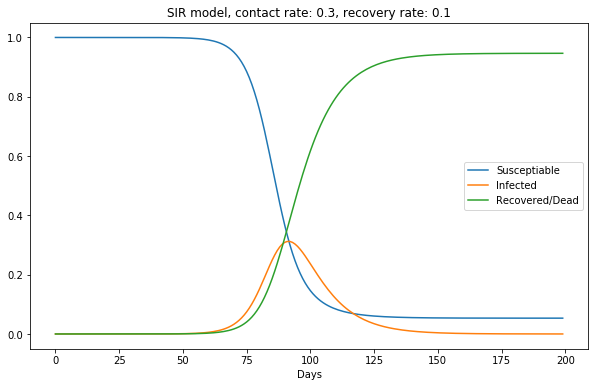

In [6]:
contact_rate= 0.3     #Contact rate
recovery_rate = 0.1   #Rate of recovery

sir_calculation(contact_rate, recovery_rate,initialy_infected,susceptiable_people)
    
pyplot.legend()
pyplot.title(f"SIR model, contact rate: {contact_rate}, recovery rate: {recovery_rate}")
pyplot.gcf().set_size_inches((10, 6))
pyplot.xlabel("Days")
pyplot.show()

In [7]:
def sir_infected_calculation(contact_rate, recovery_rate,initialy_infected,susceptiable_people):
    """This function calculates SIR model and plots just infected peole"""
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        infected[t+1]=infected[t]+infected[t]*contact_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contact_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
        
    pyplot.plot(infected,label=f"Recovery rate: {recovery_rate}, contact rate: {contact_rate}")

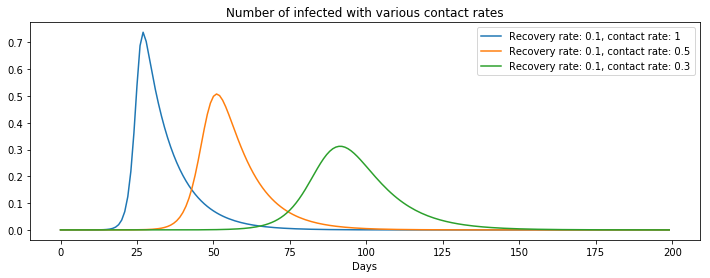

In [8]:
different_contact_rates = [1,0.5,0.3]   #Different contact rates

recovery_rate = 0.1   #Rate of recovery

for contact_rate in different_contact_rates:
    sir_infected_calculation(contact_rate, recovery_rate,initialy_infected,susceptiable_people)
    
pyplot.legend()
pyplot.title(f"Number of infected with various contact rates")
pyplot.gcf().set_size_inches((12, 4))
pyplot.xlabel("Days")
pyplot.show()

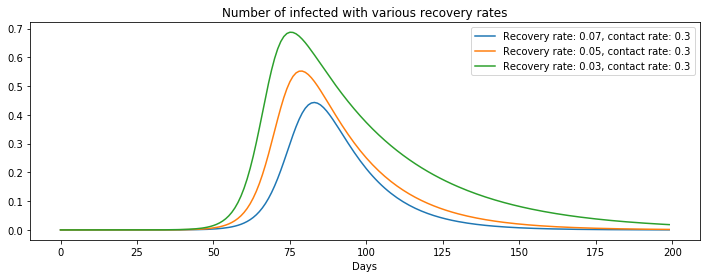

In [9]:
initialy_infected=1
susceptiable_people=(population-initialy_infected)  #Suscepitable are everyone without the one who was initaly infected

contact_rate=0.3  #Contact rate

different_recovery_rates = [0.07,0.05,0.03]  #Different recovery rates

for recovery_rate in different_recovery_rates:
    sir_infected_calculation(contact_rate, recovery_rate,initialy_infected,susceptiable_people)
    
pyplot.legend()
pyplot.title(f"Number of infected with various recovery rates")
pyplot.gcf().set_size_inches((12, 4))
pyplot.xlabel("Days")
pyplot.show()